In [2]:
# Binary Classification Model
import pandas as pd
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC



In [94]:
# Create classifiers
lr= LogisticRegression(solver='lbfgs',class_weight='balanced', max_iter=10000)
svc=LinearSVC(C=1.0)
rfc=RandomForestClassifier()

In [15]:
# reading dataset -Pima Indians Diabetes Database (Extracted from Kaglgle)
pima = pd.read_csv('C:\Lambton\Prof Debashish -  Introduction to Artificial Intelligence\Assignmemnt 1/diabetes.csv')
pima.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [14]:
pima.tail(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [17]:
# Checking information about column types

# Target variable: Outcome (Takes value as 0 and 1 )
# Independent variables: Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age

pima.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [18]:
#checking no of rows and columns
pima.shape

(768, 9)

In [19]:
# Checking missing values in the dataset
pima.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [20]:
# Checking columns
pima.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [37]:
pima['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [21]:
# Checking summary statistics for the variables- mean, median, standard deviation, minimum, maximum, 25 percentile
# 50th percentile and 75th percentile
pima.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [25]:
# Visualization import
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:>

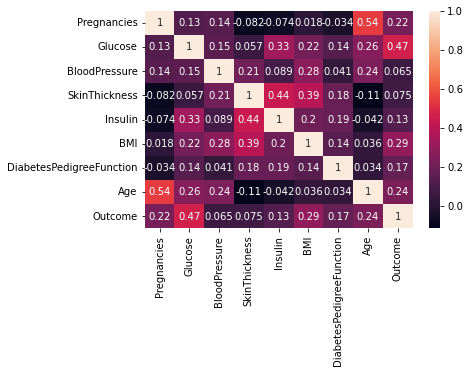

In [26]:
sns.heatmap(pima.corr(),annot=True)

Text(0.5, 1.0, 'Diabetes Patient')

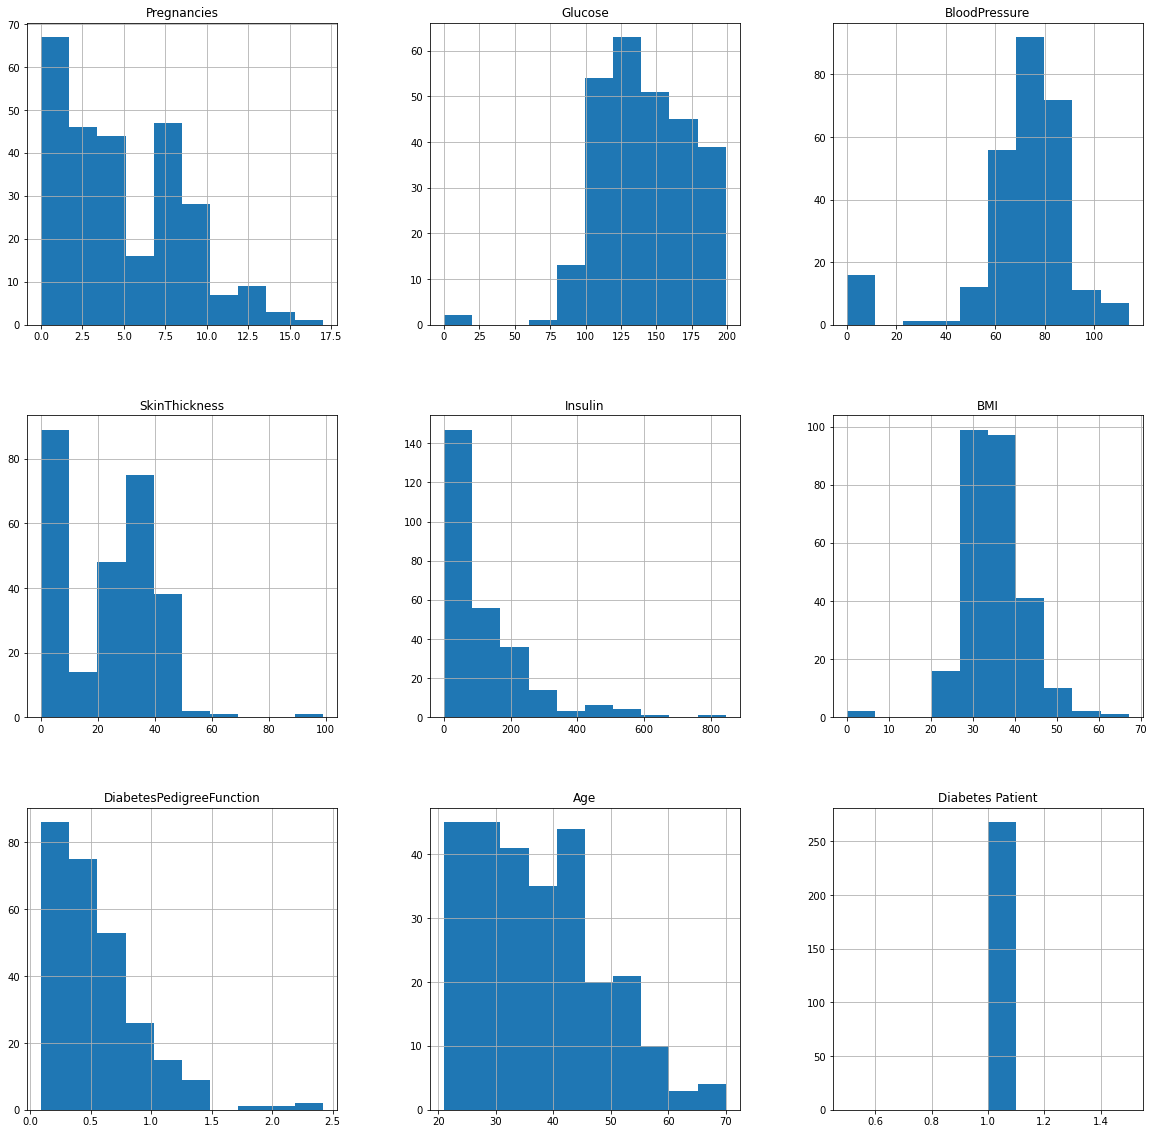

In [27]:
# Checking Data distribution for variables
p = pima[pima['Outcome']==1].hist(figsize = (20,20))
plt.title('Diabetes Patient')

In [64]:
pima=pima.values
pima

array([[  6.   , 148.   ,  72.   , ...,   0.627,  50.   ,   1.   ],
       [  1.   ,  85.   ,  66.   , ...,   0.351,  31.   ,   0.   ],
       [  8.   , 183.   ,  64.   , ...,   0.672,  32.   ,   1.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,   0.245,  30.   ,   0.   ],
       [  1.   , 126.   ,  60.   , ...,   0.349,  47.   ,   1.   ],
       [  1.   ,  93.   ,  70.   , ...,   0.315,  23.   ,   0.   ]])

In [65]:
X = pima[:,0:8] #Predictors
y = pima[:,8] #Target

In [66]:
# Splitting the data into train(80%) and test (20%)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y , test_size=0.20, random_state=0)
#train, test= train_test_split(pima, test_size=0.2)

In [67]:
X_train.shape

(614, 8)

In [68]:
# No of records in train dataset
X_test.shape

(154, 8)

In [69]:
# No of records in test dataset
y_train.shape

(614,)

In [70]:
y_test.shape

(154,)

In [ ]:
# Logistic regression
# fit the model with the data
lr.fit(X_train,y_train)

In [74]:
# model performance on test dataset
lr.score(X_test,y_test)

0.7662337662337663

In [75]:
#predict the model
y_pred=lr.predict(X_test)

Confusion Matrix
[[82 25]
 [11 36]]

True Positive(TP)  =  36
False Positive(FP) =  25
True Negative(TN)  =  82
False Negative(FN) =  11

Accuracy of the binary classifier = 0.766


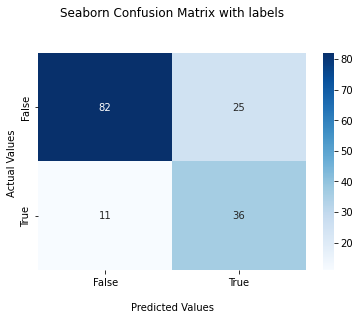

In [89]:
#Creating confusion matrix

from sklearn.metrics import confusion_matrix
print("Confusion Matrix")
matrix = confusion_matrix(y_test,y_pred)
print(matrix)
print ("")
TN, FP, FN, TP = confusion_matrix(y_test, y_pred).ravel()

print('True Positive(TP)  = ', TP)
print('False Positive(FP) = ', FP)
print('True Negative(TN)  = ', TN)
print('False Negative(FN) = ', FN)

accuracy =  (TP + TN) / (TP + FP + TN + FN)
print("")
print('Accuracy of the binary classifier = {:0.3f}'.format(accuracy))

ax = sns.heatmap(matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [90]:
# Creating classification matrix and calculating accuracy score

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

print("\nClassification Report")
report = classification_report(y_test,y_pred)
print(report)
lr_accuracy = accuracy_score(y_test, y_pred)
print('Logistic Regression Accuracy of Model: {:.2f}%'.format(lr_accuracy*100))



Classification Report
              precision    recall  f1-score   support

         0.0       0.88      0.77      0.82       107
         1.0       0.59      0.77      0.67        47

    accuracy                           0.77       154
   macro avg       0.74      0.77      0.74       154
weighted avg       0.79      0.77      0.77       154

Logistic Regression Accuracy of Model: 76.62%


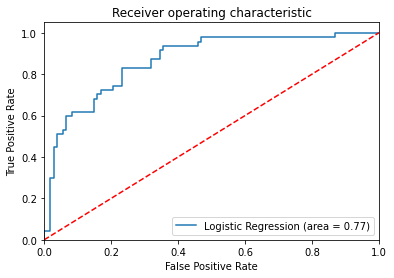

In [91]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, lr.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, lr.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [ ]:
#Random Forest Classifier

In [95]:
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [96]:
# Model performance Train dataset
rfc.score(X_train, y_train)

1.0

In [97]:
# model performance on test dataset
rfc.score(X_test,y_test)

0.7987012987012987

In [98]:
#predict the model on test
y_pred=rfc.predict(X_test)

Confusion Matrix
[[93 14]
 [17 30]]

True Positive(TP)  =  30
False Positive(FP) =  14
True Negative(TN)  =  93
False Negative(FN) =  17

Accuracy of the binary classifier = 0.799


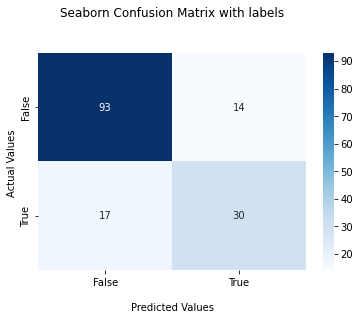

In [99]:
#Creating confusion matrix

from sklearn.metrics import confusion_matrix
print("Confusion Matrix")
matrix = confusion_matrix(y_test,y_pred)
print(matrix)
print ("")
TN, FP, FN, TP = confusion_matrix(y_test, y_pred).ravel()

print('True Positive(TP)  = ', TP)
print('False Positive(FP) = ', FP)
print('True Negative(TN)  = ', TN)
print('False Negative(FN) = ', FN)

accuracy =  (TP + TN) / (TP + FP + TN + FN)
print("")
print('Accuracy of the binary classifier = {:0.3f}'.format(accuracy))

ax = sns.heatmap(matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [100]:
# Creating classification matrix and calculating accuracy score

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

print("\nClassification Report")
report = classification_report(y_test,y_pred)
print(report)
lr_accuracy = accuracy_score(y_test, y_pred)
print('Logistic Regression Accuracy of Model: {:.2f}%'.format(lr_accuracy*100))



Classification Report
              precision    recall  f1-score   support

         0.0       0.85      0.87      0.86       107
         1.0       0.68      0.64      0.66        47

    accuracy                           0.80       154
   macro avg       0.76      0.75      0.76       154
weighted avg       0.80      0.80      0.80       154

Logistic Regression Accuracy of Model: 79.87%
